A model comparision between RMSprop and Stochastic Gradient Descent layers in keras with MNIST dataset to improve accuracy

In [1]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import RMSprop, SGD
import numpy as np
%matplotlib inline

Using TensorFlow backend.


Import all the necessary classes. Keras layers (Dense, Activation), optimizers (RMSprop, SGD), Utilities, Numpy.
Note to self: np_utils is used to convert classes data to different numerical categories

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

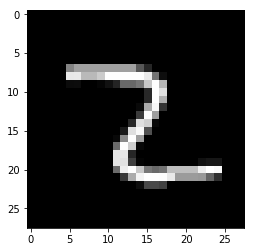

In [4]:
plt.imshow(x_train[np.random.randint(0, len(x_train))], cmap='gray')

Flatten out the data set since we'll be using 28*28 input neurons and they don't need to have a sense of 2D image data for predictions.

In [5]:
x_train, x_test = x_train.reshape(x_train.shape[0], -1), x_test.reshape(x_test.shape[0], -1)

In [6]:
x_train.shape

(60000, 784)

In [7]:
y_train.shape

(60000,)

In [8]:
x_train, x_test = x_train.astype('float32'), x_test.astype('float32') # Convert data type into float for division by 255

Normalise the train and test dataset between 0 and 1.

In [9]:
x_train /= 255

In [10]:
x_test /= 255

In [11]:
y_train = np_utils.to_categorical(y_train, 10) #Change the classes of y (0...9) from integer to a binary.
y_test = np_utils.to_categorical(y_test, 10)

In [12]:
y_test.shape

(10000, 10)

In [13]:
model = Sequential()
model.add(Dense(x_train.shape[1], input_dim = x_train.shape[1]))

In [14]:
model.add(Activation('relu'))

In [15]:
model.add(Dense(10))

In [16]:
model.add(Activation('softmax'))

In [17]:
model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
activation_1 (Activation)    (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(x_train, y_train, batch_size=1000, epochs=10, verbose=1, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 40us/step - loss: 2.0214 - acc: 0.4264 - val_loss: 1.7297 - val_acc: 0.6843
Epoch 2/10
54000/54000 [==============================] - 2s 39us/step - loss: 1.5619 - acc: 0.7165 - val_loss: 1.3324 - val_acc: 0.7942
Epoch 3/10
54000/54000 [==============================] - 2s 40us/step - loss: 1.2449 - acc: 0.7782 - val_loss: 1.0627 - val_acc: 0.8362
Epoch 4/10
54000/54000 [==============================] - 2s 39us/step - loss: 1.0330 - acc: 0.8077 - val_loss: 0.8837 - val_acc: 0.8547
Epoch 5/10
54000/54000 [==============================] - 2s 40us/step - loss: 0.8907 - acc: 0.8255 - val_loss: 0.7618 - val_acc: 0.8688
Epoch 6/10
54000/54000 [==============================] - 3s 46us/step - loss: 0.7917 - acc: 0.8376 - val_loss: 0.6759 - val_acc: 0.8798
Epoch 7/10
54000/54000 [==============================] - 2s 43us/step - loss: 0.7197 - acc: 0.8465 - val_loss: 0.6124 - val_acc:

In [20]:
score = model.evaluate(x_test, y_test, verbose=1)

10000/10000 [==============================] - 1s 53us/step


In [21]:
print('Model Accuracy = {}%'.format(score[1]*100))

Model Accuracy = 87.7%


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


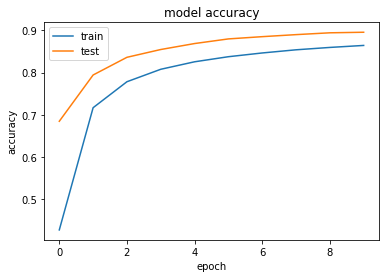

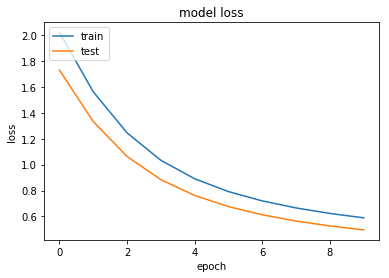

In [22]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
model.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
history = model.fit(x_train, y_train, batch_size=1000, epochs=10, verbose=1, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 44us/step - loss: 0.3735 - acc: 0.8916 - val_loss: 0.2097 - val_acc: 0.9398
Epoch 2/10
54000/54000 [==============================] - 3s 48us/step - loss: 0.2150 - acc: 0.9378 - val_loss: 0.1444 - val_acc: 0.9612
Epoch 3/10
54000/54000 [==============================] - 2s 40us/step - loss: 0.1564 - acc: 0.9546 - val_loss: 0.1222 - val_acc: 0.9655
Epoch 4/10
54000/54000 [==============================] - 2s 40us/step - loss: 0.1193 - acc: 0.9658 - val_loss: 0.1033 - val_acc: 0.9703
Epoch 5/10
54000/54000 [==============================] - 2s 40us/step - loss: 0.0923 - acc: 0.9737 - val_loss: 0.0874 - val_acc: 0.9750
Epoch 6/10
54000/54000 [==============================] - 2s 40us/step - loss: 0.0753 - acc: 0.9788 - val_loss: 0.0841 - val_acc: 0.9777
Epoch 7/10
54000/54000 [==============================] - 2s 40us/step - loss: 0.0619 - acc: 0.9820 - val_loss: 0.0711 - val_acc:

In [25]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Model Accuracy = {}%'.format(score[1]*100))

10000/10000 [==============================] - 1s 54us/step
Model Accuracy = 97.55%


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


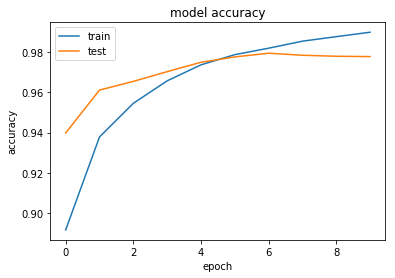

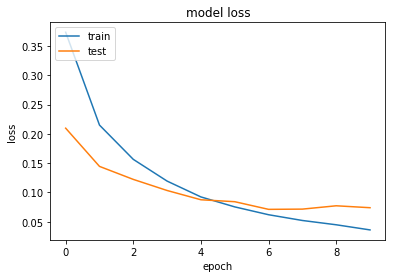

In [26]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()